In [1]:
import bccr
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
consulta = bccr.ServicioWeb()

In [4]:
consulta.buscar(todos='inflación subyacente')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
1264,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]')",(ISI) INDICE SUBYACENTE DE INFLACION (BASE JULIO 2006=100),Nivel,NO DEFINIDO,Mensual
1267,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]')",INDICE SUBYACENTE DE INFLACION VARIACION INTERANUAL,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
4160,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]/Bienes [4160]')",Bienes,Nivel,Unidades,Mensual
27118,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]/Bienes [27118]')",Bienes,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
4181,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]/Servicios [4181]')",Servicios,Nivel,Unidades,Mensual
27119,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]/Servicios [27119]')",Servicios,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
24171,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por persistencia [24171]'),Inflación subyacente reponderada por persistencia,Nivel,Unidades,Mensual
24172,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por persistencia [24172]'),Inflación subyacente reponderada por persistencia,Porcentaje Variación Interanual,Unidades,Mensual
24174,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por volatilidad [24174]'),Inflación subyacente reponderada por volatilidad,Nivel,Unidades,Mensual


In [5]:
isi = consulta({'25725':'isi'})

In [21]:
isi

variable,isi
2006-08,0.895052
2006-09,0.236138
2006-10,0.524076
2006-11,0.601677
2006-12,0.730769
...,...
2019-11,-0.020546
2019-12,-0.032258
2020-01,0.111306
2020-02,0.052665


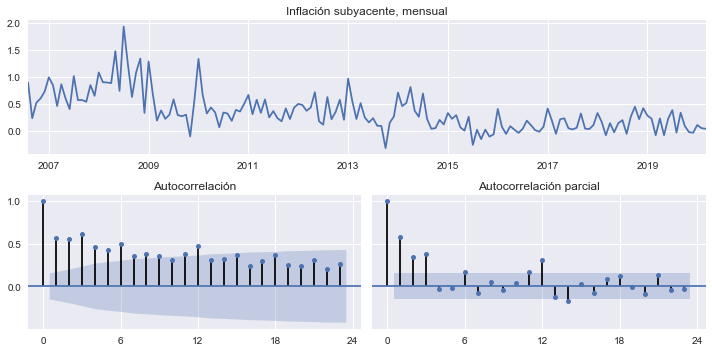

In [6]:
plt.style.use('seaborn')
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

isi.plot(ax=ax, title='Inflación subyacente, mensual', legend=None)
plot_acf(isi, ax=axs0, title='Autocorrelación')
plot_pacf(isi, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
fig.savefig('ISI-AR3.pdf', bbox_inches='tight')

In [7]:
res = ARIMA(isi, order=[3,0,0]).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    isi   No. Observations:                  164
Model:                     ARMA(3, 0)   Log Likelihood                  -7.320
Method:                       css-mle   S.D. of innovations              0.252
Date:                Wed, 22 Apr 2020   AIC                             24.639
Time:                        06:59:11   BIC                             40.138
Sample:                    08-31-2006   HQIC                            30.931
                         - 03-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3535      0.104      3.384      0.001       0.149       0.558
ar.L1.isi      0.2534      0.073      3.469      0.001       0.110       0.396
ar.L2.isi      0.1996      0.074      2.679      0.007       0.054       0.346
ar.L3.isi      0.3690      0.073      5.059      0.000       0.226       0.512
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0944           -0.0000j            1.0944           -0.0000
AR.2           -0.8176           -1.3445j            1.5736           -0.3370
AR.3           -0.8176           +1.3445j            1.5736            0.3370
-----------------------------------------------------------------------------
"""

In [8]:
sss = res.summary()

with open('AR3-ISI.tex','w') as file:
    file.write(sss.tables[1].as_latex_tabular())

In [9]:
1 / res.arroots

array([ 0.91373171+0.j        , -0.33018675+0.54296469j,
       -0.33018675-0.54296469j])

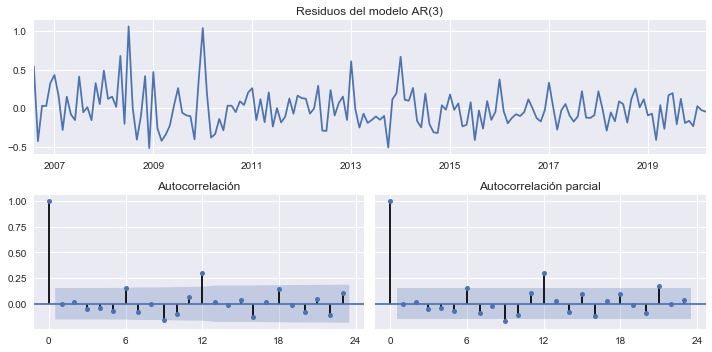

In [10]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

res.resid.plot(ax=ax, title='Residuos del modelo AR(3)', legend=None)
plot_acf(res.resid, ax=axs0, title='Autocorrelación')
plot_pacf(res.resid, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
fig.savefig('ISI-AR3resid.pdf', bbox_inches='tight')

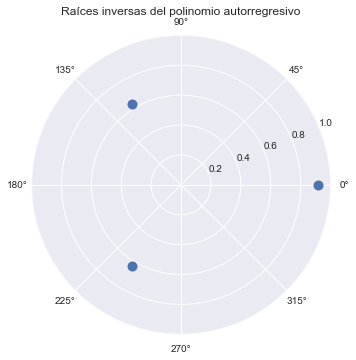

In [11]:

arroots = 1/res.arroots


plt.polar(np.angle(arroots), np.abs(arroots), '.', ms=20)
fig = plt.gcf()
ax = fig.gca()
ax.set_rlim([0,1])
ax.set_title('Raíces inversas del polinomio autorregresivo')
fig.savefig('ISI-AR3roots.pdf', bbox_inches='tight')

## selection of p and q

In [12]:
pmax = 4
qmax = 2
P = np.arange(pmax+1)
Q = np.arange(qmax+1)

bic = [[ARIMA(isi, order=[p,0,q]).fit().bic for q in Q ] for p in P ]
aic = [[ARIMA(isi, order=[p,0,q]).fit().aic for q in Q ] for p in P ]

In [23]:
Q

array([0, 1, 2])

In [13]:
BIC = pd.DataFrame(bic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
AIC = pd.DataFrame(aic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
BIC

,q=0,q=1,q=2
p=0,134.219847,98.916773,96.170548
p=1,73.608252,43.142053,47.418550
p=2,58.669478,47.708343,53.035939
p=3,40.138421,45.114117,50.017404
p=4,45.099728,50.127632,49.900971


In [14]:
AIC

,q=0,q=1,q=2
p=0,128.020114,89.617173,83.771082
p=1,64.308653,30.742587,31.919218
p=2,46.270012,32.209011,34.436740
p=3,24.639089,26.514918,28.318339
p=4,26.500529,28.428567,25.102039


In [15]:
AIC.round(2).to_latex('ISI-AR3aic.tex')
BIC.round(2).to_latex('ISI-AR3bic.tex')

## Pronóstico

In [24]:
horizon = 36
ff, std, conf = res.forecast(steps=horizon, alpha=0.05)

In [17]:
from scipy.stats import norm

In [18]:
alpha = np.arange(1,6)/10
zvalues = norm(0, 1).isf(np.array(alpha)/2)

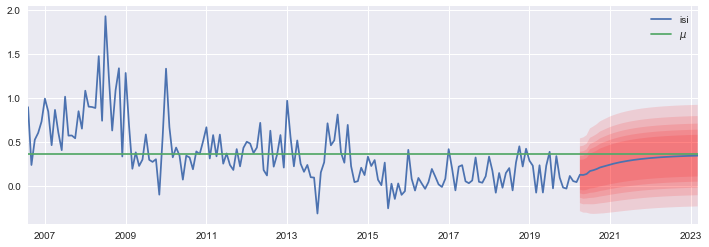

In [19]:
fcast = pd.DataFrame({'isi':ff,'std':std}, index=pd.period_range(isi.index[-1]+1, periods=horizon, freq='M'))


fcast2 = pd.concat([isi,fcast], sort=False)
fcast2['$\mu$'] = isi.values.mean()


fig, ax =plt.subplots(figsize=[12,4])
fcast2[['isi','$\mu$']].plot(ax=ax)

d = fcast2.index.values

def intervalo(z):
    return fcast2['isi']+z*fcast2['std'],  fcast2['isi']-z*fcast2['std']


for z in zvalues:
    ax.fill_between(d, *intervalo(z), facecolor='red', alpha=0.12, interpolate=True)

fig.savefig('ISI-AR3forecast.pdf', bbox_inches='tight')    

# Exportar datos a STATA

In [20]:
isi.index = isi.index.to_series().astype(str)
isi.to_stata('isi.dta')